In [1]:
import os
import json
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [3]:
with open('wtag_result_new.json', 'r') as f:
    result = json.load(f)

In [4]:
with open('/Users/jessiehe/vlm_prompting/backend/app/data/wtag_raw_data_with_recipe.json', 'r') as f:
    raw_data = json.load(f)

In [5]:
pred_mapping = {'question':0, 'answer':1, 'confirmation':2, 'hesitation':3, 'self description':4, 'Question': 0, 'Answer':1, 'Confirmation':2, 'Hesitation': 3, 'Self Description':4}

In [6]:
def relationship_computation(y1, y2, y):
    if y1 == y2 and y2 == y:
        return 'R'
    elif y1 == y2 and y2 != y:
        return 'Complement-S'
    elif y1 != y2 and y1 == y:
        return 'U1'
    elif y1 != y2 and y2 == y:
        return 'U2'
    elif y1 != y2 and y2 != y:
        return 'Conflict-S'

In [7]:
data_result_dict = {}
for key in raw_data.keys():
    data_result_dict[key] = {}
    data_result_dict[key]['instruction'] = raw_data[key]['instr_info']['pre_instr']
    data_result_dict[key]['label'] = raw_data[key]['label']
    data_result_dict[key]['description'] = raw_data[key]['description']
    data_result_dict[key]['prediction'] = {}
    response = json.loads(result[key]['content'])
    data_result_dict[key]['prediction']['overall'] = response['overall_intention']
    data_result_dict[key]['prediction']['visual'] = response['visual_intention']
    data_result_dict[key]['prediction']['language'] = response['linguistic_intention']
    data_result_dict[key]['prediction']['explanation'] = response['explanation']
    overall_pred = pred_mapping[data_result_dict[key]['prediction']['overall']] if data_result_dict[key]['prediction']['overall'] in pred_mapping else -999
    visual_pred = pred_mapping[data_result_dict[key]['prediction']['visual']] if data_result_dict[key]['prediction']['visual'] in pred_mapping else -999
    language_pred = pred_mapping[data_result_dict[key]['prediction']['language']] if data_result_dict[key]['prediction']['language'] in pred_mapping else -999
    data_result_dict[key]['interaction_type'] = relationship_computation(language_pred, visual_pred, overall_pred)

In [8]:
ground_truth = []
predictions = []
false_list = []
for videoid in data_result_dict.keys():
    gt = pred_mapping[data_result_dict[videoid]['label']]
    prediction = pred_mapping[data_result_dict[videoid]['prediction']['overall']]
    
    ground_truth.append(pred_mapping[data_result_dict[videoid]['label']])
    predictions.append(pred_mapping[data_result_dict[videoid]['prediction']['overall']])
    if gt != prediction:
        false_list.append(videoid)

In [9]:
len(false_list)

772

In [10]:
confusion_matrix = confusion_matrix(ground_truth, predictions, labels=[0, 1, 2, 3, 4])

In [13]:
confusion_matrix

array([[ 16, 153, 273,   3,   0],
       [  0,  10,  35,   3,   0],
       [  1,  31, 298,   7,   0],
       [  0,   4,  17,   5,   1],
       [  1, 100, 140,   3,   1]])

In [11]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2, 3, 4])

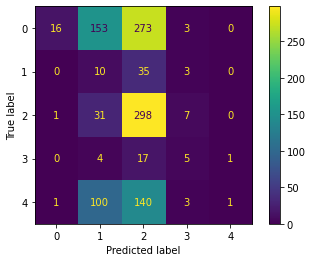

In [12]:
cm_display.plot()

In [122]:
len(data_result_dict.keys())

1102

In [82]:
data_result_dict['T49_42']

{'instruction': ["uh so before adding the oil we're going to whisk these ingredients together and then add the liquid indgredients",
  'Answer'],
 'label': 'Confirmation',
 'description': 'The scene and action description is: A person is sequentially adding ingredients into a bowl and whisking, likely preparing batter or dough for cooking or baking. The spoken content is: whisk them together great',
 'prediction': {'overall': 'confirmation',
  'visual': 'answer',
  'language': 'confirmation',
  'explanation': "Based on the visual information of the person sequentially adding ingredients into a bowl and whisking, along with the spoken content 'whisk them together great,' it is evident that the user is actively following the task steps to prepare batter or dough. The user's action of whisking the ingredients aligns with the previous instruction to whisk the ingredients together before adding the liquid ingredients. Therefore, the user's intention is to confirm that they are whisking the 

In [123]:
relationship_dict = {
    'R': [],
    'Complement-S': [],
    'U1': [],
    'U2': [],
    'Conflict-S': []
}

In [124]:
for key in false_list:
    relationship_dict[data_result_dict[key]['interaction_type']].append(key)

In [139]:
result_dict = {}
for key in relationship_dict['Conflict-S']:
    result_dict[key] = data_result_dict[key] 

In [140]:
len(result_dict)

2

In [141]:
with open('result_dict_Conflict-S.json', 'w') as f:
    json.dump(result_dict, f)

In [142]:
with open('wtag_data_result_dict.json', 'w') as f:
    json.dump(data_result_dict, f)